# Predicting Heart Disease 

GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)



## Imports



In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [68]:
df = pd.read_csv('heart.csv')

In [69]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [70]:
df['target'].unique()

array([1, 0], dtype=int64)

### Exploratory Data Analysis and Visualization




In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [72]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Visualization Tasks



<AxesSubplot:xlabel='target', ylabel='count'>

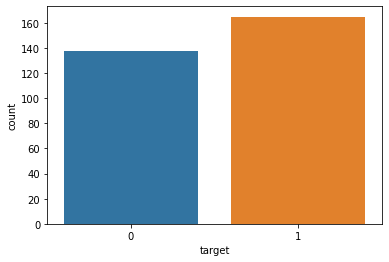

In [73]:
sns.countplot(data=df, x='target')

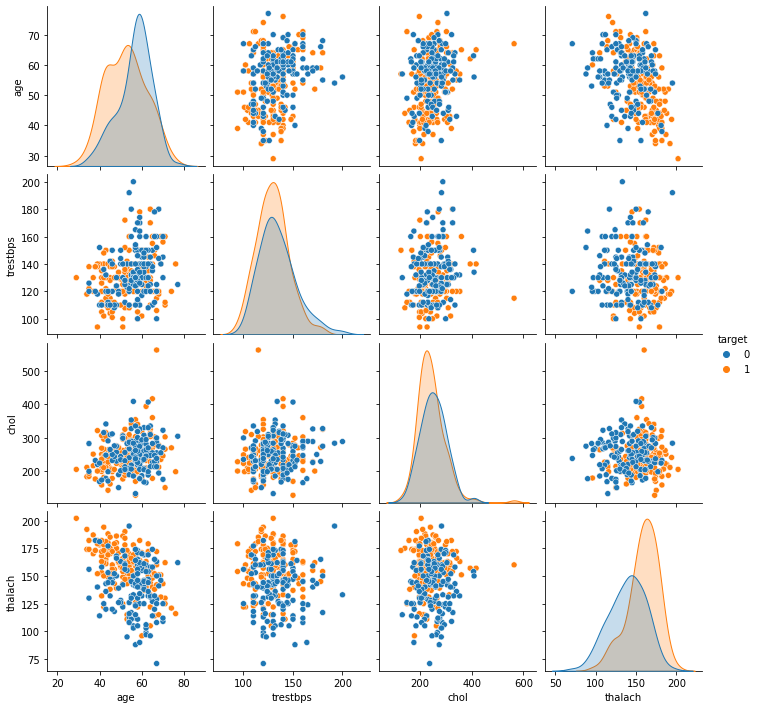

In [74]:
sns.pairplot(df[['age','trestbps', 'chol','thalach', 'target']], hue='target')

<AxesSubplot:>

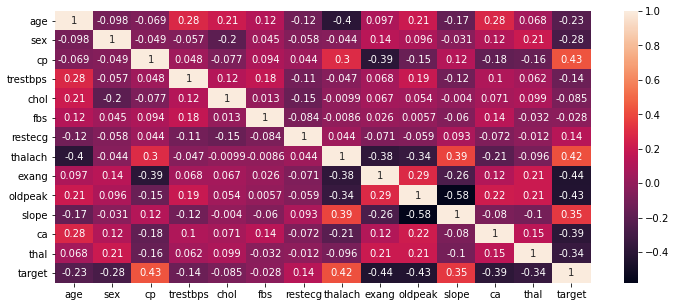

In [75]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True)

----
----

# Machine Learning

## Train | Test Split and Scaling



In [76]:
X = df.drop('target', axis=1)
y = df['target']

In [77]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Logistic Regression Model



In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
log_model = LogisticRegression(max_iter=5000)

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
penalty = ['l2']

C = np.logspace(0,5,10)
grid_model = GridSearchCV(log_model, param_grid={'C':C, 'penalty':penalty})

In [91]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e+00, 3.59381366e+00, 1.29154967e+01, 4.64158883e+01,
       1.66810054e+02, 5.99484250e+02, 2.15443469e+03, 7.74263683e+03,
       2.78255940e+04, 1.00000000e+05]),
                         'penalty': ['l2']})

In [97]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [98]:
log_model.C

1.0

---------

## Model Performance Evaluation

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report

In [100]:
y_pred = grid_model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [101]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

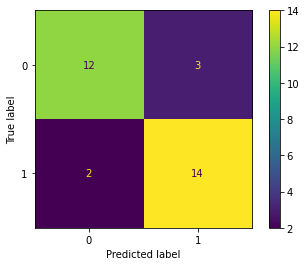

In [103]:
plot_confusion_matrix(grid_model, X_test, y_test)

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves



In [105]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

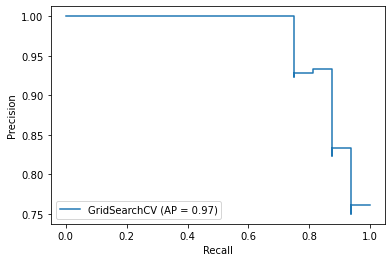

In [106]:
plot_precision_recall_curve(grid_model, X_test, y_test)

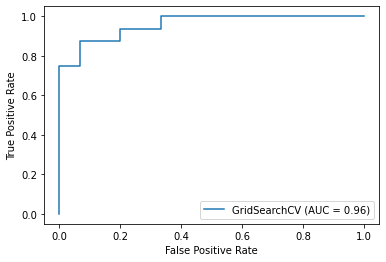

In [107]:
plot_roc_curve(grid_model, X_test, y_test)

### Example Patient:

In [120]:
df.iloc[221]

age          55.0
sex           1.0
cp            0.0
trestbps    140.0
chol        217.0
fbs           0.0
restecg       1.0
thalach     111.0
exang         1.0
oldpeak       5.6
slope         0.0
ca            0.0
thal          3.0
target        0.0
Name: 221, dtype: float64

In [119]:
patient = [[55.0,1.0,0.0,140.0,217.0,0.0,1.0,111.0,1.0,5.6,0.0,0.0,3.0]]

In [117]:
grid_model.predict(patient)

array([0], dtype=int64)

In [118]:
grid_model.predict_proba(patient)

array([[0.99588881, 0.00411119]])

In [121]:
import joblib

In [122]:
joblib.dump(grid_model, 'mygrid.pkl')

['mygrid.pkl']

In [123]:
joblib.dump(X.columns, 'mycols.pkl')

['mycols.pkl']

In [125]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
target:0 for no presence of heart disease, 1 for presence of heart disease